<a href="https://colab.research.google.com/github/hbhb0311/Study/blob/main/Pytorch/PART1-%20BasicML/MNISTIntroduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch

In [2]:
# parameters
training_epochs = 15
batch_size = 100

mnist_train = dsets.MNIST(root = 'dataset/', train = True, transform = transforms.ToTensor(), download = True)
mnist_test = dsets.MNIST(root = 'dataset/', train = False, transform = transforms.ToTensor(), download = True)
data_loader = torch.utils.data.DataLoader(dataset = mnist_train, batch_size = batch_size, shuffle = True, drop_last = True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Softmax

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias = True).to(device)

# parameters
training_epochs = 15
batch_size = 100

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        # [batch_size, 1, 28, 28] = reshape => [batch_size, 784]
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
        
    print('Epoch: ', '%04d' % (epoch+1), 'cost = ', '{:.9f}'.format(avg_cost))           

Epoch:  0001 cost =  0.536006451
Epoch:  0002 cost =  0.359014511
Epoch:  0003 cost =  0.331095874
Epoch:  0004 cost =  0.316301763
Epoch:  0005 cost =  0.306888372
Epoch:  0006 cost =  0.299959451
Epoch:  0007 cost =  0.294940412
Epoch:  0008 cost =  0.290743709
Epoch:  0009 cost =  0.287360698
Epoch:  0010 cost =  0.284436226
Epoch:  0011 cost =  0.281894922
Epoch:  0012 cost =  0.279719472
Epoch:  0013 cost =  0.277863920
Epoch:  0014 cost =  0.276195288
Epoch:  0015 cost =  0.274351180


# Test

In [5]:
# grad 사용하지 않음
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy : ', accuracy.item())

Accuracy :  0.8869999647140503


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# Visualization

In [6]:
import matplotlib.pyplot as plt
import random

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Label:  8
Prediction:  8


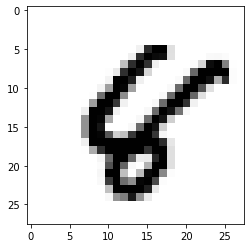

In [7]:
# get one and predict 

r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r: r+1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r: r+1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = linear(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r: r+1].view(28, 28), cmap = 'Greys', interpolation = 'nearest')
plt.show()